TO DO:
Move cis into separate notebook and do it for all 3 cancer types. Try to get the graph combined

For the trans effects run them for all 62 phosphosites.
Figure out why we keep getting this error:
Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.

In [1]:
import cptac
import cptac.utils as u
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
en = cptac.Endometrial()

In [3]:
phos = en.get_phosphoproteomics()

In [4]:
phos.head()

Name         AAAS                  AACS  AAED1 AAGAB          AAK1         \
Site         S495    S541   Y485   S618    S12  S310   S311    S14    S18   
Patient_ID                                                                  
C3L-00006     NaN     NaN    NaN -0.881 -1.810   NaN    NaN    NaN -0.242   
C3L-00008     NaN     NaN    NaN    NaN  0.084   NaN    NaN -1.110 -0.383   
C3L-00032  -0.202     NaN    NaN    NaN -1.880   NaN    NaN    NaN  0.382   
C3L-00090  -0.002     NaN -0.407    NaN    NaN   NaN    NaN    NaN    NaN   
C3L-00098   0.556 -0.0461    NaN    NaN  0.941   NaN  0.429  0.362  0.697   

Name                ...     ZZZ3                                            \
Site           S20  ...     S397 S411 S420   S424     S426 S468   S89 T415   
Patient_ID          ...                                                      
C3L-00006  -0.2420  ...  0.18400  NaN  NaN    NaN -0.20500  NaN   NaN  NaN   
C3L-00008  -1.0900  ... -0.17100  NaN  NaN -0.393 -0.17100  NaN  0.29  NaN   
C3L-00032  -0.0416  ...      NaN  NaN  NaN    NaN      NaN  NaN   NaN  NaN   
C3L-00090  -0.5550  ...  0.13970  NaN  NaN    NaN -0.55900  NaN   NaN  NaN   
C3L-00098  -0.0529  ... -0.15875  NaN  NaN  0.196  0.06175  NaN   NaN  NaN   

Name                        
Site          T418    Y399  
Patient_ID                  
C3L-00006      NaN     NaN  
C3L-00008   0.1605 -0.0635  
C3L-00032      NaN     NaN  
C3L-00090      NaN  0.2980  
C3L-00098      NaN -0.2900  

[5 rows x 73212 columns]

# CIS Endo

In [5]:
gene = 'PIK3CA'

In [6]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [7]:
mut_and_phos = missense.join(phos['PIK3CA'])
mut_and_phos.head()

,Mutation,S312,T313
Patient_ID,,,
C3L-00006,Missense_Mutation,-0.00615,0.0731
C3L-00008,Wildtype_Tumor,-0.02220,NaN
C3L-00032,Missense_Mutation,NaN,0.0830
C3L-00090,Wildtype_Tumor,NaN,-0.8460
C3L-00136,Wildtype_Tumor,0.20500,NaN


In [8]:
phos_col = list(phos['PIK3CA'].columns)

In [9]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T313,0.149861
0,S312,0.494436


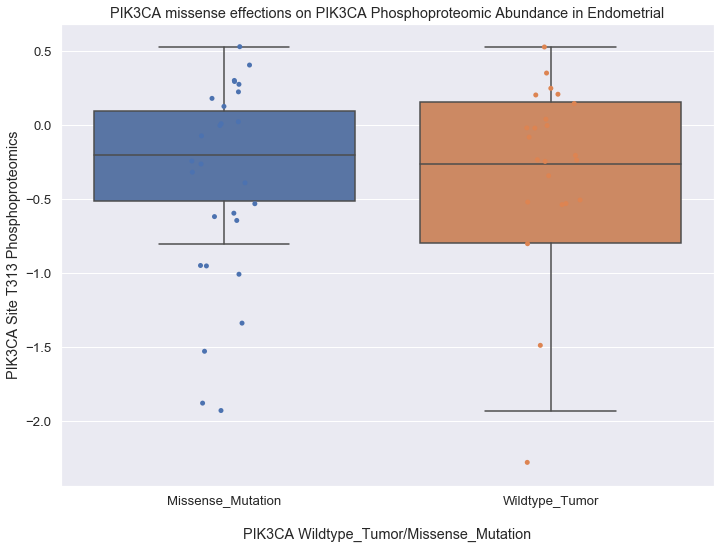

In [11]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y='S312',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=mut_and_phos,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Phosphoproteomic Abundance in Endometrial")
boxplot = sns.stripplot(x='Mutation', y='S312', data=mut_and_phos, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+" Site T313 Phosphoproteomics")

# format_pval_annotation('* P-value = .149', 0, 1, 1)

plt.show()
plt.clf()
plt.close()



# CIS in Brca

In [12]:
br = cptac.Brca()

In [13]:
phos = br.get_phosphoproteomics()
phos = br.reduce_multiindex(phos, 'Peptide')
phos = br.reduce_multiindex(phos, "Database_ID")
phos.head()

cptac warning: Due to dropping the specified levels, dataframe now has 146 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: Due to dropping the specified levels, dataframe now has 356 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


Name        A2M    AAAS           AAED1    AAGAB            AAK1          \
Site       S710    S495    S541     S12 S310S311    S311     S14     S18   
Patient_ID                                                                 
CPT000814   NaN  1.9431     NaN     NaN   0.0127 -0.4495     NaN -1.1852   
CPT001846   NaN  0.2274     NaN  0.5472   0.6895 -0.7680     NaN  0.6895   
X01BR001    NaN -2.2853 -0.8967  4.1225   0.4842 -1.2458 -0.0310  0.8805   
X01BR008    NaN  1.3714     NaN -0.0636  -0.6224 -1.2732 -1.1351 -0.8652   
X01BR009    NaN  0.2682     NaN     NaN  -0.6207 -2.3561 -0.3078  0.3785   

Name                             ...   ZZEF1    ZZZ3                          \
Site           S21 S618T620S623  ...   S2526    S113    S314    S381    S391   
Patient_ID                       ...                                           
CPT000814  -0.8333       0.0863  ... -1.7098  0.0735  0.2238 -0.6702 -8.8556   
CPT001846   0.3903          NaN  ...     NaN -0.8199     NaN -0.8790 -4.0222   
X01BR001    0.7448       1.0649  ...     NaN  0.1092     NaN     NaN -1.6299   
X01BR008    0.0031       0.2173  ...  0.7110  0.3824     NaN     NaN  1.3333   
X01BR009    0.6990      -0.1082  ... -1.4189 -0.7779     NaN     NaN  0.5267   

Name                                                     
Site          S397 S397T428N429    S606     S82     S89  
Patient_ID                                               
CPT000814      NaN      -0.8493 -0.1744 -0.0273 -6.8916  
CPT001846      NaN       1.1806 -1.2700 -0.8983 -3.6228  
X01BR001   -0.2017      -0.3953 -2.1328 -0.8815 -2.1191  
X01BR008    0.7840       0.1078  0.4824     NaN -0.9748  
X01BR009   -0.6661       0.5539 -0.3728     NaN -0.8354  

[5 rows x 38775 columns]

In [14]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [15]:
mut_and_phos = missense.join(phos['PIK3CA'])
mut_and_phos.head()

,Mutation,T315
Patient_ID,,
CPT001846,Missense_Mutation,0.0935
X01BR001,Wildtype_Tumor,-1.1909
X01BR008,Wildtype_Tumor,0.1777
X01BR020,Wildtype_Tumor,-0.5601
X01BR023,Wildtype_Tumor,-0.2415


In [16]:
phos_col = list(phos['PIK3CA'].columns)

In [17]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

,Comparison,P_Value
0,T315,0.32307


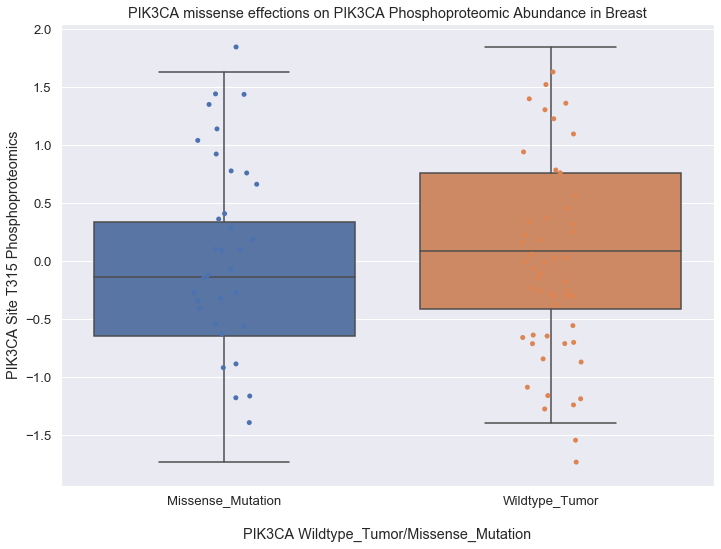

In [19]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y='T315',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=mut_and_phos,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Phosphoproteomic Abundance in Breast")
boxplot = sns.stripplot(x='Mutation', y='T315', data=mut_and_phos, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+" Site T315 Phosphoproteomics")

# format_pval_annotation('* P-value = .323', 0, 1, 1)

plt.show()
plt.clf()
plt.close()



# CIS in Colon. THERE is no PIK3CA gene for colon

In [1]:
import cptac
cl = cptac.Colon()

In [5]:
phospho = cl.get_phosphoproteomics()

In [10]:
y_site_filter = phospho.columns.get_level_values("Name").str.contains("PIK") # Create a boolean filter selecting all columns where the Site level contains a "Y"

y_sites = phospho.loc[:, y_site_filter] # Select the columns
y_sites.head()
y_sites.columns

MultiIndex([('PIK3AP1',  'S174', 'Q6ZUJ8'),
            ('PIK3AP1',  'S640', 'Q6ZUJ8'),
            ('PIK3AP1',  'S642', 'Q6ZUJ8'),
            ('PIK3AP1',  'S759', 'Q6ZUJ8'),
            ('PIK3AP1',  'T151', 'Q6ZUJ8'),
            ('PIK3C2A', 'S1553', 'O00443'),
            ('PIK3C2A',  'S259', 'O00443'),
            ('PIK3C2A',  'S329', 'O00443'),
            ('PIK3C2B',  'S155', 'O00750'),
            ('PIK3C2B',  'S308', 'O00750'),
            ( 'PIK3C3',  'S165', 'Q8NEB9'),
            ( 'PIK3CD',  'S520', 'O00329'),
            ( 'PIK3R1',  'S154', 'P27986'),
            ( 'PIK3R2',  'S263', 'O00459'),
            ( 'PIK3R4',  'S853', 'Q99570'),
            ( 'PIK3R4',  'S865', 'Q99570'),
            ( 'PIK3R4',  'S892', 'Q99570'),
            ( 'PIK3R4',  'S925', 'Q99570'),
            ( 'PIK3R5',  'S458', 'Q8WYR1'),
            ( 'PIK3R5',  'S497', 'Q8WYR1'),
            ( 'PIK3R5',  'T486', 'Q8WYR1'),
            ( 'PIK3R6',  'S358', 'Q5UE93'),
            ('PIKFYVE',  'S105',

In [26]:
#Prioritize hotspot mutations
col = cl.get_genotype_all_vars(gene, mutation_hotspot=["H1047R", 'E542K', 'E535K'])
#pull out all the missense mutation and wildtype tumors 
missense = col.loc[(col['Mutation'] == "nonsynonymous SNV") | (col['Mutation'] == "Wildtype_Tumor")]
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])
missense

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


Name,Mutation
Patient_ID,
01CO001,Wildtype_Tumor
01CO005,Wildtype_Tumor
01CO006,Wildtype_Tumor
01CO013,Wildtype_Tumor
01CO015,Wildtype_Tumor
...,...
20CO007,nonsynonymous SNV
22CO004,Wildtype_Tumor
22CO006,Wildtype_Tumor


In [28]:
phos = cl.get_phosphoproteomics()
phos = cl.reduce_multiindex(phos, "Database_ID")

phos = cl.reduce_multiindex(phos, "Site")
phos

cptac warning: Due to dropping the specified levels, dataframe now has 150 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: Due to dropping the specified levels, dataframe now has 29481 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 4)


Name,AAAS,AAAS,AAAS,AAED1,AAGAB,AAGAB,AAK1,AAK1,AAK1,AAK1,...,ZZEF1,ZZEF1,ZZEF1,ZZEF1,ZZEF1,ZZZ3,ZZZ3,ZZZ3,ZZZ3,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO005,NaN,NaN,-0.2400,-0.460,NaN,NaN,-0.231,NaN,NaN,NaN,...,NaN,-0.6750,-1.404,-1.404,NaN,-0.572,NaN,0.205,NaN,NaN
01CO006,-0.3650,NaN,NaN,-0.424,-0.015,-0.015,NaN,-0.485,NaN,NaN,...,NaN,-0.2875,0.222,0.222,-0.701,0.624,NaN,NaN,NaN,NaN
01CO008,0.7250,0.137,0.1370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.147,-0.1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.03
01CO013,0.2265,NaN,NaN,-1.278,0.403,0.075,-0.223,-0.701,NaN,NaN,...,-0.041,0.0430,0.554,0.554,0.127,1.263,NaN,NaN,NaN,NaN
01CO014,0.5600,NaN,NaN,-0.382,NaN,NaN,NaN,-0.259,NaN,NaN,...,NaN,-0.1290,-0.919,-0.919,NaN,0.032,NaN,0.026,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006.N,-0.3240,-0.482,-0.1945,0.158,NaN,NaN,0.102,-0.461,NaN,NaN,...,NaN,0.3630,1.549,1.549,NaN,NaN,NaN,NaN,0.379,NaN
21CO007.N,-1.0220,NaN,NaN,NaN,NaN,NaN,0.670,0.342,NaN,NaN,...,NaN,0.5570,-0.004,-0.004,0.546,NaN,NaN,-0.090,0.043,NaN
22CO004.N,-0.6120,NaN,NaN,-0.404,NaN,-0.493,NaN,-0.072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.179,NaN,NaN,NaN


In [31]:

phos.columns.

Name,AAAS,AAAS,AAAS
Patient_ID,,,
01CO005,NaN,NaN,-0.2400
01CO006,-0.3650,NaN,NaN
01CO008,0.7250,0.137,0.1370
01CO013,0.2265,NaN,NaN
01CO014,0.5600,NaN,NaN
...,...,...,...
21CO006.N,-0.3240,-0.482,-0.1945
21CO007.N,-1.0220,NaN,NaN
22CO004.N,-0.6120,NaN,NaN


In [ ]:
# mut_and_phos = missense.join(phos['PIK3CA'])
# mut_and_phos.head()

# mTOR phosphorylation

In [ ]:
# phos['MTOR']

In [ ]:
mut_and_phos.index.difference(phos['MTOR'].index)

In [ ]:
mut_and_phos = missense.join(phos['MTOR'])

In [ ]:
# mut_and_phos.head()

In [ ]:
phos_col = list(phos['MTOR'].columns)

In [ ]:
# mut_and_phos.head()

In [ ]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

#sites that have problems: S1851, S2454, T1829, T1837

In [ ]:
df = mut_and_phos[['Mutation', "S2454"]].dropna()
u.wrap_ttest(df, 'Mutation', ['S2454'], return_all = True)

In [ ]:
phos['MTOR']

In [ ]:
mut_and_phos

# Plot

In [ ]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [ ]:
site = "S2069"

In [ ]:
df.head()

In [ ]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.002', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# AKT

In [ ]:
gene1_filter = phos.columns.get_level_values("Name").str.startswith("AKT") # Select all columns where the gene starts with "AA". This will grab every column where the key "Name" starts with AA
gene1_data = phos.loc[:, gene1_filter]
gene1_data.head()

In [ ]:
akt1 = gene1_data['AKT1']

In [ ]:
mut_and_phos = missense.join(akt1)
mut_and_phos

In [ ]:
phos_col = list(gene1_data['AKT1'].columns)

In [ ]:
result = pd.DataFrame(columns=['Comparison', 'P_Value'])
dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
akt1s1 = gene1_data['AKT1S1']
mut_and_phos = missense.join(akt1s1)
phos_col = list(gene1_data['AKT1S1'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
AKT2 = gene1_data['AKT2']
mut_and_phos = missense.join(AKT2)
phos_col = list(gene1_data['AKT2'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
AKT3 = gene1_data['AKT3']
mut_and_phos = missense.join(AKT3)
phos_col = list(gene1_data['AKT3'].columns)
result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

In [ ]:
gene1_data['AKT3']

# The 62 from the paper. 

kinases RPS6KA5
and EIF2AK4

In [ ]:
phos['RPS6KA5']

In [ ]:
mut_and_phos = missense.join(phos['RPS6KA5'])
phos_col = list(phos['RPS6KA5'].columns)

result = pd.DataFrame(columns=['Comparison', 'P_Value'])

dfs = []
for column in mut_and_phos:
#     import pdb; pdb.set_trace()
    if column == "Mutation": pass
    else:
        site = mut_and_phos[column]
        df = mut_and_phos[['Mutation', column]].dropna()
#         df['Site'] = site
        dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
newdf = pd.concat(dfs)
#we're sorting
newdf.sort_values('P_Value')

## S517

In [ ]:
site = 'S517'

In [ ]:
df = mut_and_phos[['Mutation', site]].dropna()

In [ ]:
df

In [ ]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.002', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

## S628

In [ ]:
site = 'S628'

In [ ]:
df = mut_and_phos[['Mutation', site]].dropna()

In [ ]:
df

In [ ]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=site, 
                         order = ['Wildtype_Tumor', 'Missense_Mutation'], data = df, showfliers = False)    
boxplot.set_title('PIK3CA Missense Effect on '+site+' Phosphoproteomic Abundance in Endometrial Tumors')
boxplot = sns.stripplot(x='Mutation', y=site, data = df, jitter = True, 
                           color = ".3", order = ['Wildtype_Tumor', 'Missense_Mutation'], dodge = True)
boxplot.set(xlabel = "\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel = site+' Phosphoproteomics')

format_pval_annotation('* P-Value = 0.08', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Make a function for the rest of them

In [ ]:
def transEffect(protein):
    mut_and_phos = missense.join(phos[protein])
    phos_col = list(phos[protein].columns)

    result = pd.DataFrame(columns=['Comparison', 'P_Value'])

    dfs = []
    for column in mut_and_phos:
    #     import pdb; pdb.set_trace()
        if column == "Mutation": pass
        else:
            site = mut_and_phos[column]
            df = mut_and_phos[['Mutation', column]].dropna()
    #         df['Site'] = site
            dfs.append(u.wrap_ttest(df, 'Mutation', [column], return_all = True))
    newdf = pd.concat(dfs)
    #we're sorting
    newdf = newdf.sort_values('P_Value')
    return newdf


In [ ]:
transEffect('TRIM28')

In [ ]:
protein_list_from_paper = [
'TRIM28',
'ARHGEF35',
'RPS6KA5',
'EIF2AK4',
'SRRT',
'BCL9',
'TP53BP1',
# 'FAM21A',
'MAPT',
'MAPT',
'TSC22D3',
'HEATR3',
'MED26',
'ACIN1',
'HUWE1',
'GTF3C1',
'ZC3H14',
'KRT8',
'MAPT',
'SPAG7',
'ARID4B',
'METTL3',
'MAPT',
'MAPT',
'MAPT',
'UBXN2B',
'RAVER1',
'RTF1',
'RXRA',
'PHF20L1',
'WWC3',
# 'WHSC2',
'GTF2F1',
'RPS6KA5',
'UBXN7',
'BCL2L11',
'NOSIP',
'MPG',
'PPP6R2',
'KHDRBS1',
'FIP1L1',
'STAT3',
'RAPH1',
'NFIA',
'HUWE1',
'DDX17',
'TSC22D3',
'NFIA',
# 'KIAA1468',
# 'ANXA11',
'RAVER1',
'FAM83H',
'WIZ',
'DTNBP1',
# 'C1ORF174',
'RBM5',
'INTS1',
'RBM10',
'KCTD1',
'TAF3',
'PRR12']

In [ ]:
# transEffect('FAM184B')

In [ ]:
table = []
for protein in protein_list_from_paper:
    df = transEffect(protein)
    df = df.assign(Protein=protein)
    table.append(df)
    
pd.concat(table)
